# Marginalization and Conditioning of Gaussian Distribution

Given a Gaussian distribution $\cal{N}(\mu, \Sigma)$ or $\cal{N}^{-1}(\eta, \Lambda)$, where we have $\Lambda \mu = \eta$, $\Sigma^{-1} = \Lambda$, its marginalization and conditioning can be described as the figure below:

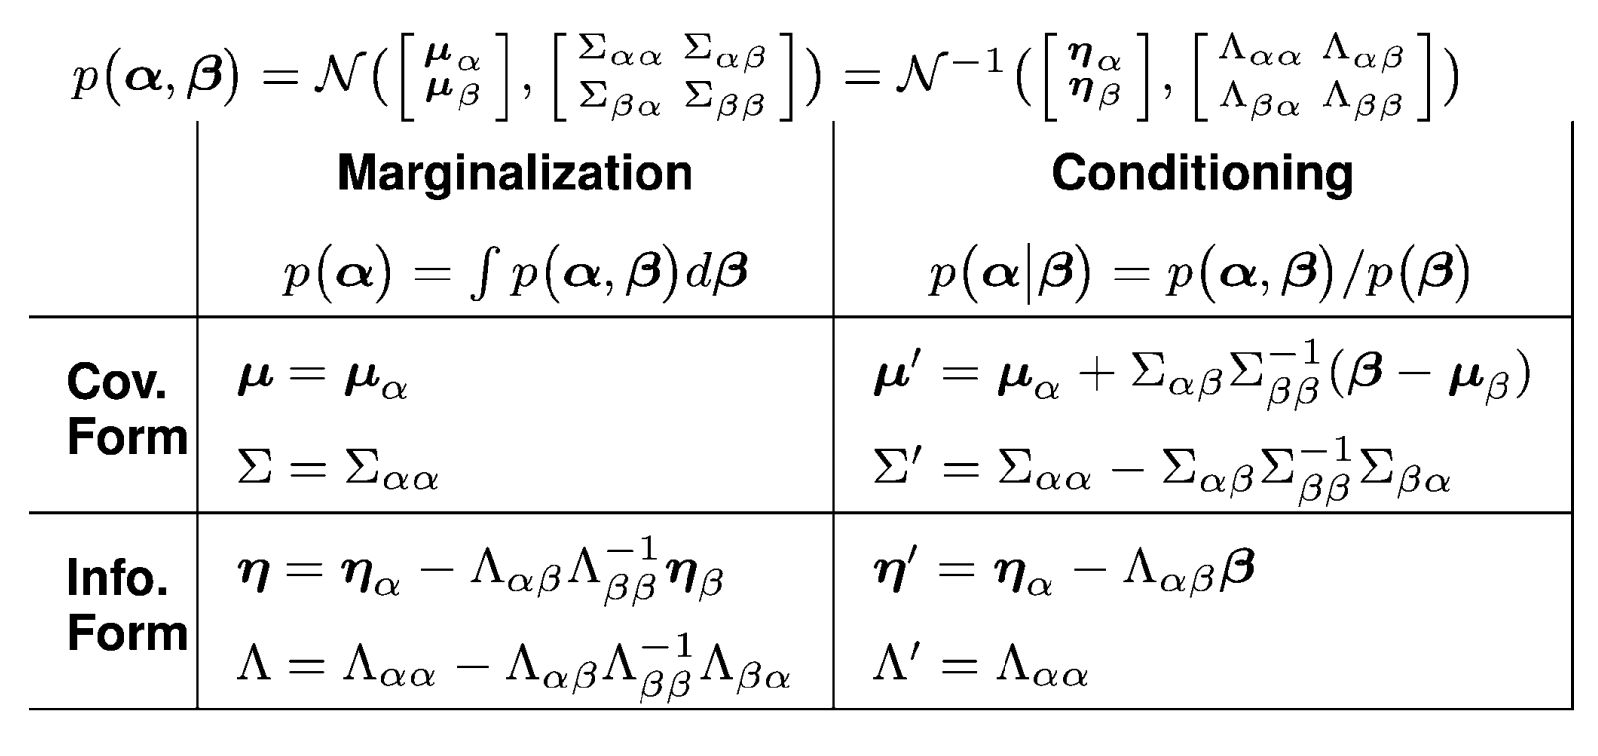

In [4]:
# Gaussian Distribution 
from IPython.display import Image
Image('../images/2021-01-21-gaussian-marginalization/gaussian.png', width=600)
#

Without explaining the details, we assume we get the final linear equation $Ax = b$ from a SLAM or bundle adjustment problem, where $A$ is a square matrix. Let's put it into an information form. $\Lambda_{cc}$ is a $M \times M$ matrix and $\Lambda_{ll}$ is a $N \times N$ matrix. $M$ is the number of camera keyframes while $N$ is the number of landmarks. 

$$
\begin{bmatrix}
\Lambda_{cc} & \Lambda_{cl} \\
\Lambda_{lc} & \Lambda_{ll}
\end{bmatrix}
\begin{bmatrix}
\mu_c \\
\mu_l
\end{bmatrix}=
\begin{bmatrix}
\eta_c \\
\eta_l
\end{bmatrix}
$$

With Schur Complement, we can find $\mu_c$ and $\mu_l$ by inverting two $M \times M$ and $N \times N$ matrices instead of inverting a $(M+N) \times (M+N)$ matrix. We will first find camera positions $\mu_c$, and then find
landmark positions $\mu_l$. Thinking it in a probabilistic way, Schur Complement is actually doing following:

$$ p(c, l) = p(c) * p(l|c) $$

It first marginalizes landmarks l to get p(c), then find l conditioned on camera poses c. We assume p(c, l) follows the Gaussian distribution in information form:

$$
p(c, l) \sim (\begin{bmatrix}
\eta_c \\
\eta_l
\end{bmatrix}, \begin{bmatrix}
\Lambda_{cc} & \Lambda_{cl} \\
\Lambda_{lc} & \Lambda_{ll}
\end{bmatrix} )
$$

Recall the first figure in this blog, we consider $\alpha$ as $c$ and $\beta$ as $l$. So we the information form based marginalization, we can get $p(c) \sim \cal{N}(\eta, \Lambda)$ as:
$$
\begin{align}
\eta &= \eta_c - \Lambda_{cl}\Lambda^{-1}_{ll}\eta_l \\
\Lambda &= \Lambda_{cc} - \Lambda_{cl}\Lambda^{-1}_{ll}\Lambda_{lc}
\end{align}
$$
Then the camera poses will be obtained by solving $\Lambda \mu_c = \eta$, and its corresponding uncertainties are $\Sigma_{cc} = \Lambda^{-1}$.

Once we get $\mu$, we could find landmarks information by:
$$
\begin{align}
\eta' &= \eta_l - \Lambda_{lc}\mu_c \\
\Lambda' &= \Lambda_{ll}
\end{align}
$$
Then the landmark positions will be obtained by solving $\Lambda' \mu_l = \eta'$, and its corresponding uncertainties are $\Sigma_{ll} = \Lambda'^{-1}$